# Astropy Introduction

Astropy is a set of python functions designed to be helpful for astronomers.  Most of the astropy functions we will use are for reading fits files and converting between different coordinates in the sky.  Let's start by using astropy.io to examine the data stored in a fits file. 

In [1]:
from astropy.io import fits

We will also need a fits file to work with, let's use one from the astropy dataset.

In [3]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

In order to view, examine, and manipulate the data in this image, we first need to open it!  We can do that using the fits.open() function.  This function reads a fits file, and just needs the name of a file as input.  Once it is loaded, we can examine the type of information in this fits file with the info() command.

In [4]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /Users/jessicasutter/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


The info command tells us that there are two frames in our fits file, the primary science frame that will have the imaging data along with a data table called er.mask that probably has some information about how this image was processed.  We will be working with the image data in the 0th frame.  The dimensions tell us that this is image is 891x893 pixels.

Now that we know this, we can read in the data from the zeroth frame to get the info on this image.

In [5]:
image_data = hdu_list[0].data

Another nice thing we can do with astropy.io is read all the information from the header.  We can do this using the .header command, which pulls out all the header data and stores it in a dataframe.  

In [9]:
header = hdu_list[0].header
print(header)

SIMPLE  =                    T /FITS: Compliance                                BITPIX  =                   16 /FITS: I*2 Data                                  NAXIS   =                    2 /FITS: 2-D Image Data                            NAXIS1  =                  891 /FITS: X Dimension                               NAXIS2  =                  893 /FITS: Y Dimension                               EXTEND  =                    T /FITS: File can contain extensions               DATE    = '2014-01-09        '  /FITS: Creation Date                            ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                REGION  = 'ER768   '           /GSSS: Region Name                               PLATEID = 'A0JP    '           /GSSS: Plate ID                                  SCANNUM = '01      '           /GSSS: Scan Number                               DSCNDNUM= '00      '           /GSSS: De

The header stores all kinds of important information about the image, like the date it was taken, the size of the pixels, and the information necessary to determine where in the sky the image is.  For example, the header will have the RA and Dec of the central pixel, which we can read in from our header dataframe.

In [10]:
RA = header['PLATERA']
print(RA)

85.599455


The exact names of the information stored in the header will change depending on the telescope/program, so you do have to be careful.  But astropy has a nice package that can look through all the data in the header to get the 'World Coordinant System,' or WCS, information from the header that will allow us to convert easily between sky coordinants (RA, Dec) and pixel positions.  

In [11]:
from astropy.wcs import WCS
wcs = WCS(header)

Now we have the information about how to convert between pixel and sky coordinants stored in a variable called wcs, which we can use to extract fluxes from specific locations in the sky!

Okay.  We've gotten some info from the header, let's look at what our fits file is actually an image of!  We can do this using the matplotlib.pyplot function imshow, which plots 2D arrays like our imaging data.

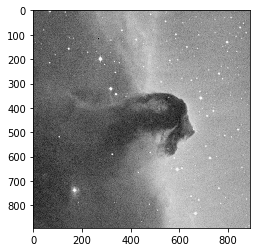

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap='gray', norm=LogNorm())

It's the horsehead nebula in Orion!  Neat, huh?   

The horsehead nebula is at RA of 5hr 40min 54s and a dec of -02degrees 27minutes 30seconds.  We can use astropy's coordinants package to make a special variable called a sky coord centered on this position on the sky.

In [15]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
horsehead_center = SkyCoord('05h40m54.0s', '-02d27m30.0s', frame='icrs')  # passing in string format
print(horsehead_center)

<SkyCoord (ICRS): (ra, dec) in deg
    (85.225, -2.45833333)>


SkyCoord objects are great because they let us easily switch between types of coordinants.  For example, I entered RA in hr,min,sec, but the skycoord program is able to convert that to degrees.  We can also convert to other coordinant systems fairly easily when we use skycoord:

In [16]:
horsehead_center.galactic

<SkyCoord (Galactic): (l, b) in deg
    (206.94603198, -16.79368854)>

Which is the location of the horsehead nebula in galactic coordinants!  And we didn't have to do any trig to figure that out!

Since we have the wcs information from the header of our horsehead nebula image, we can also convert this to a pixel location and plot a circle around the center using the command:

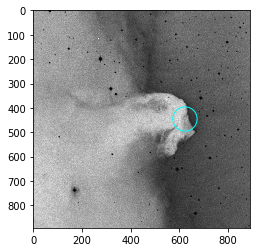

In [20]:
coords = wcs.wcs_world2pix(horsehead_center.ra, horsehead_center.dec, 0)
circle = plt.Circle((coords[0], coords[1]), 50, color='cyan', fill=False)
fig, ax = plt.subplots()
ax.add_artist(circle)
ax.imshow(image_data, cmap='gray_r', norm=LogNorm())

In the code above, I used the astropy.wcs program to transform the ra and dec in the skycoord object horsehead_center to a pixel location in our image.  Coords is a list with the form [x_pixel, y_pixel].  After I know where on the image in pixel-space the center of the horsehead nebula is, I can use matplotlib to plop a cirle with a 50 pixel radius down around that spot.  

Astropy has a lot of other great packages, but these are the main ones we will use over and over in this class.  If you want to learn more about astropy, check out the tutorials available here:
http://learn.astropy.org/